In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import re, string
from string import punctuation
import joblib
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from textblob import TextBlob
from sklearn.feature_extraction import text
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from skmultilearn.model_selection import IterativeStratification

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, Embedding, Masking, Bidirectional, SpatialDropout1D, Flatten

In [6]:
from tensorflow.keras.layers import GlobalMaxPool1D, Flatten, MaxPooling1D

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.style.use('fivethirtyeight')

In [12]:
import seaborn as sns

In [13]:
index_companies = ['Google' , 'Amazon' , 'Facebook' , 'Netflix' , 'Apple' , 'Microsoft']

In [14]:
colors = ['#3fa35d' , '#776e6e' , '#3490c1' , 
         '#e80909' , '#ad2694'  ,  '#ede62f']

In [15]:
df =  pd.read_csv("D:\MYPROJECT\Glassdoor-Reviews-Dataset-Cleaned.csv")

In [16]:
df.head()

,firm,summary,headline,pros,cons,overall_rating
0,AFH-Wealth-Management,people make destroy place great people excelle...,people make destroy place,great people excellent,poor pay huge gap pay senior management suppor...,2
1,AFH-Wealth-Management,low majority people lovely thats pro much lowe...,low,majority people lovely thats pro,much lower market standard salary ladder pay i...,1
2,AFH-Wealth-Management,good nice environment love people stressful ma...,good,nice environment love people stressful,management clicky times,4
3,AFH-Wealth-Management,review great people heading good direction gen...,review,great people heading good direction generally,low salary middle management micro manage staf...,3
4,AFH-Wealth-Management,terrible avoid like plague none lie working pa...,terrible avoid like plague,none lie working pay,unachievable bonus unfairly set manager bullyi...,1


In [17]:
df.isnull().sum()

firm                 0
summary              0
headline          7802
pros               113
cons               701
overall_rating       0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

firm              0
summary           0
headline          0
pros              0
cons              0
overall_rating    0
dtype: int64

In [20]:
pol = lambda x: TextBlob(x).sentiment.polarity

In [21]:
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [22]:
df['summary_polarity'] = df['summary'].apply(pol)

In [23]:
df['summary_subjectivity'] = df['summary'].apply(sub)

In [24]:
df['summary_polarity'].value_counts()

0.700000    3316
0.000000    2575
0.800000    2160
0.500000    1718
0.350000    1253
            ... 
0.351515       1
0.182353       1
0.260877       1
0.641818       1
0.309632       1
Name: summary_polarity, Length: 16620, dtype: int64

In [25]:
df['pros_polarity'] = df['pros'].apply(pol)

In [26]:
df['pros_subjectivity'] = df['pros'].apply(sub)

In [27]:
df['cons_polarity']  = df['cons'].apply(pol)

In [28]:
df['cons_subjectivity'] = df['cons'].apply(sub)

In [29]:
df

,firm,summary,headline,pros,cons,overall_rating,summary_polarity,summary_subjectivity,pros_polarity,pros_subjectivity,cons_polarity,cons_subjectivity
0,AFH-Wealth-Management,people make destroy place great people excelle...,people make destroy place,great people excellent,poor pay huge gap pay senior management suppor...,2,0.320000,0.650000,0.900000,0.875000,2.775558e-17,0.750000
1,AFH-Wealth-Management,low majority people lovely thats pro much lowe...,low,majority people lovely thats pro,much lower market standard salary ladder pay i...,1,0.027778,0.438889,0.500000,0.750000,-3.571429e-02,0.414286
2,AFH-Wealth-Management,good nice environment love people stressful ma...,good,nice environment love people stressful,management clicky times,4,0.600000,0.733333,0.550000,0.800000,0.000000e+00,0.000000
3,AFH-Wealth-Management,review great people heading good direction gen...,review,great people heading good direction generally,low salary middle management micro manage staf...,3,0.300000,0.390000,0.516667,0.616667,0.000000e+00,0.200000
4,AFH-Wealth-Management,terrible avoid like plague none lie working pa...,terrible avoid like plague,none lie working pay,unachievable bonus unfairly set manager bullyi...,1,-0.289000,0.624000,0.000000,0.000000,-2.100000e-01,0.582222
...,...,...,...,...,...,...,...,...,...,...,...,...
103883,the-LEGO-Group,working pretty cool fun walk around store does...,working pretty cool,fun walk around store,doesnt pay living wage,4,0.300000,0.616667,0.300000,0.200000,0.000000e+00,0.000000
103884,the-LEGO-Group,great brand family great brand culture still l...,great brand,family great brand culture still,lot bureaucracy hard make happen quickly cultu...,4,0.248333,0.628333,0.800000,0.750000,-1.194444e-01,0.547222
103885,the-LEGO-Group,awesome place work company clear purpose one t...,awesome place work,company clear purpose one truly,global brand compliance important lot,5,0.375000,0.595833,0.100000,0.383333,2.000000e-01,0.500000
103886,the-LEGO-Group,awesome company work great company awesome pro...,awesome company work,great company awesome product smart strong peo...,easy transfer,5,0.646825,0.826587,0.611905,0.781548,4.333333e-01,0.833333


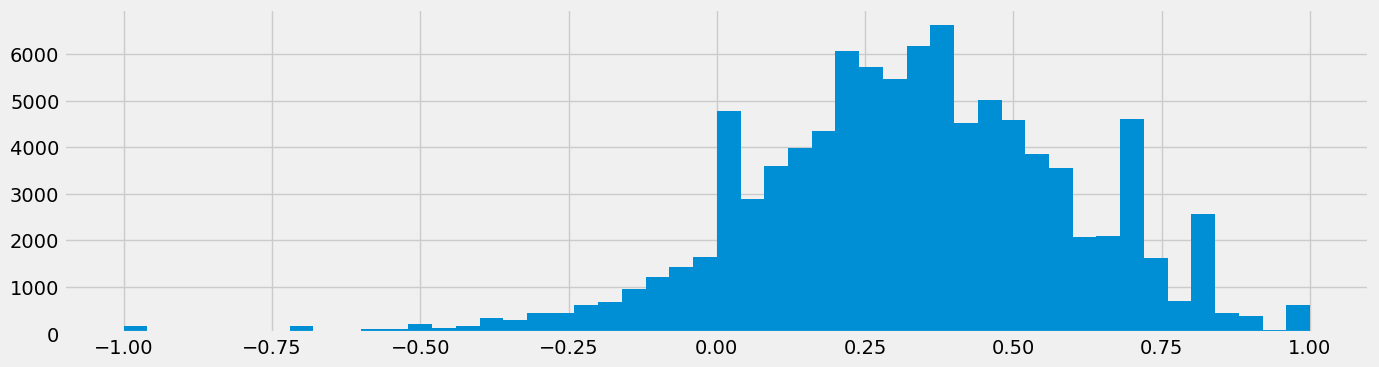

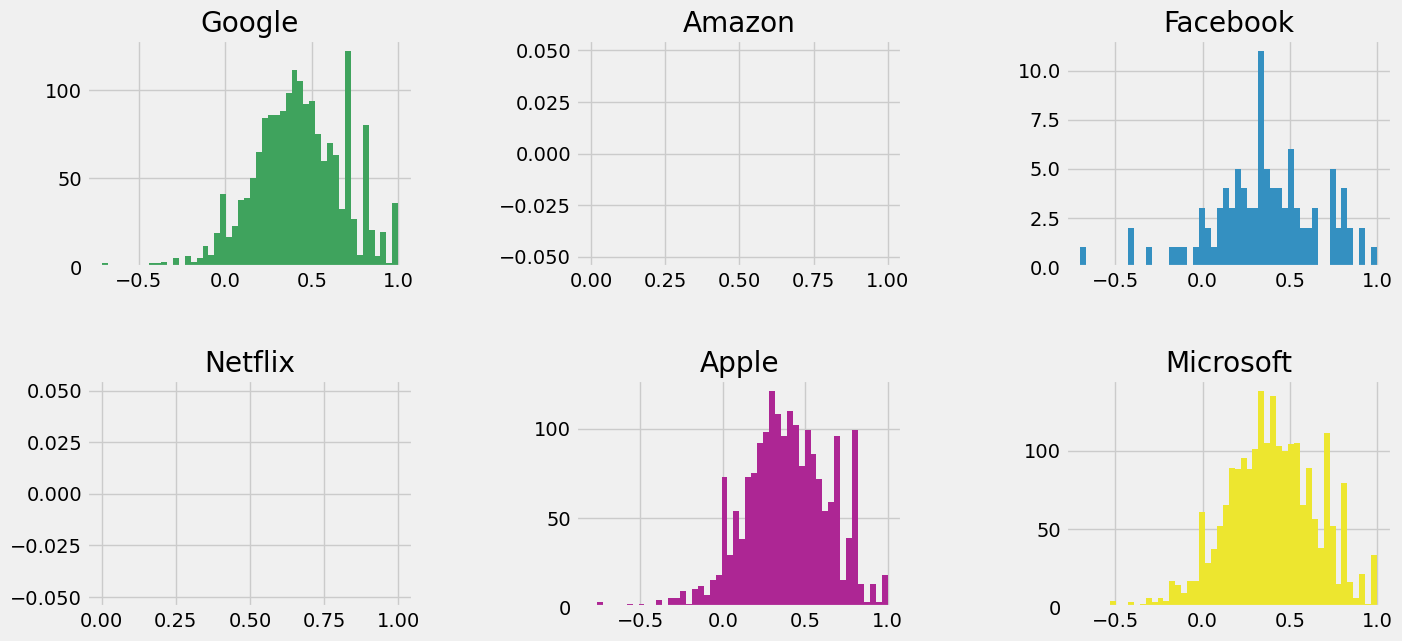

In [30]:
plt.figure(1 , figsize = (15 , 4))
plt.hist(df['summary_polarity'] , bins = 50)


plt.figure(2 , figsize = (15 , 7))
n = 0 
for comp , c in zip(index_companies , colors):
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.hist(df['summary_polarity'][df['firm'] == comp] , bins = 50 , color = c)
    plt.title(comp)
plt.show()

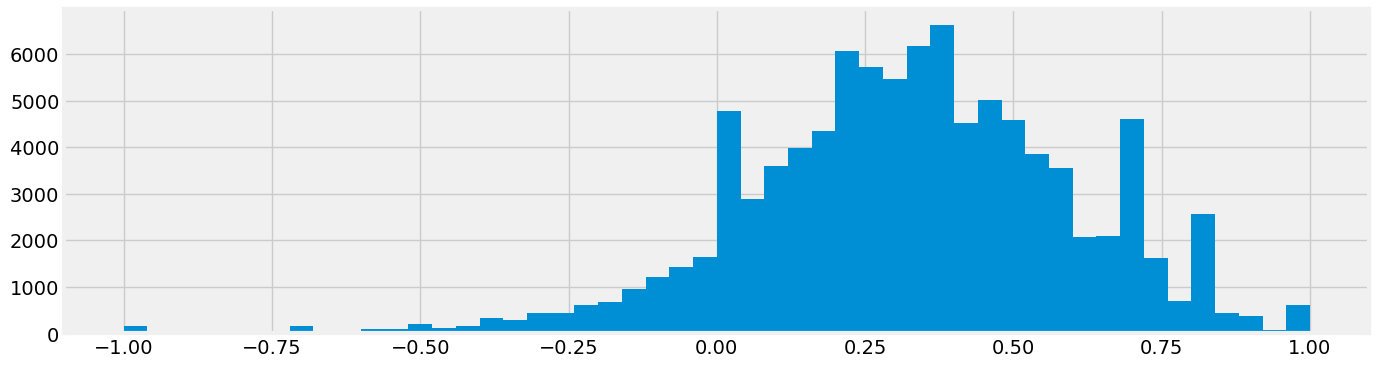

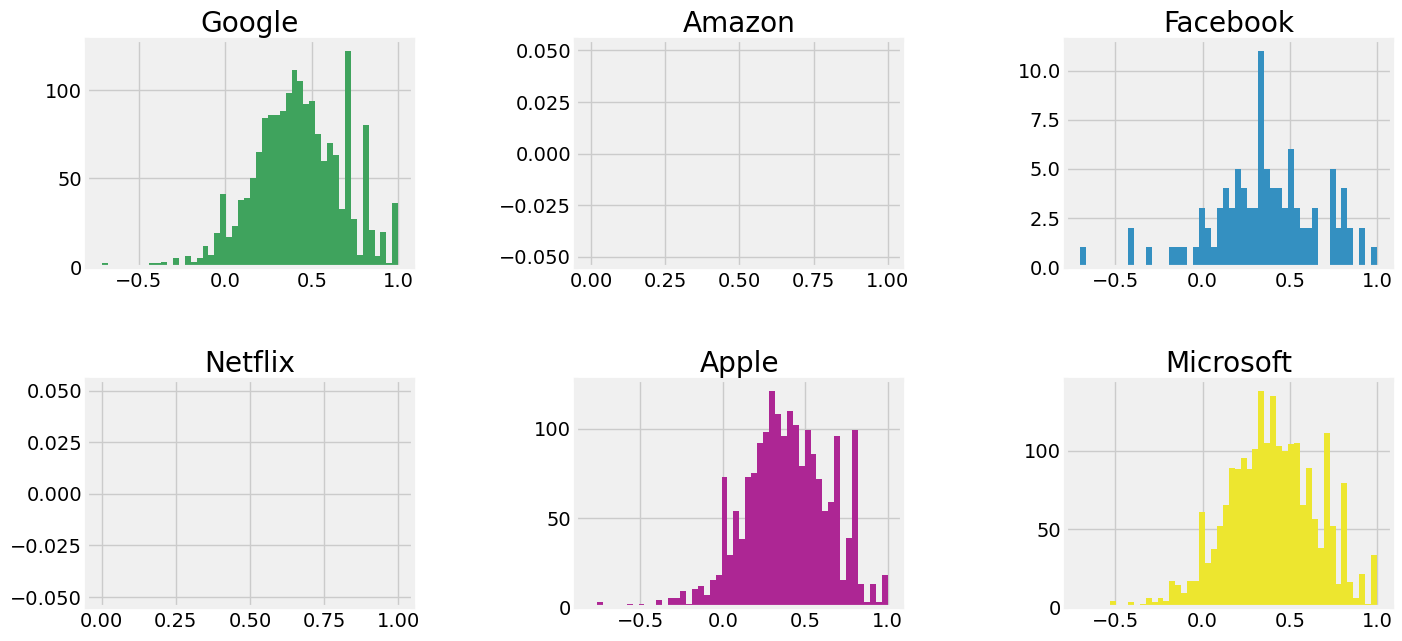

In [31]:
import matplotlib.pyplot as plt

# Your data and color definitions
# ...

# Create the first figure with a white background
plt.figure(1, figsize=(15, 4))
plt.gcf().set_facecolor('white')  # Set the background color to white
plt.hist(df['summary_polarity'], bins=50)

# Create the second figure with white background for subplots
plt.figure(2, figsize=(15, 7))
plt.gcf().set_facecolor('white')  # Set the background color to white

n = 0
for comp, c in zip(index_companies, colors):
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.hist(df['summary_polarity'][df['firm'] == comp], bins=50, color=c)
    plt.title(comp)

# Display the plots
plt.show()


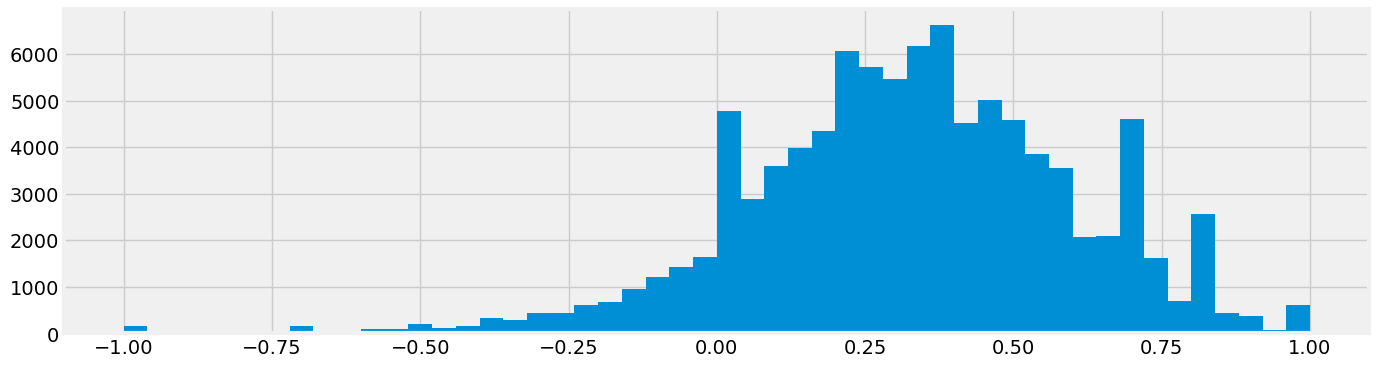

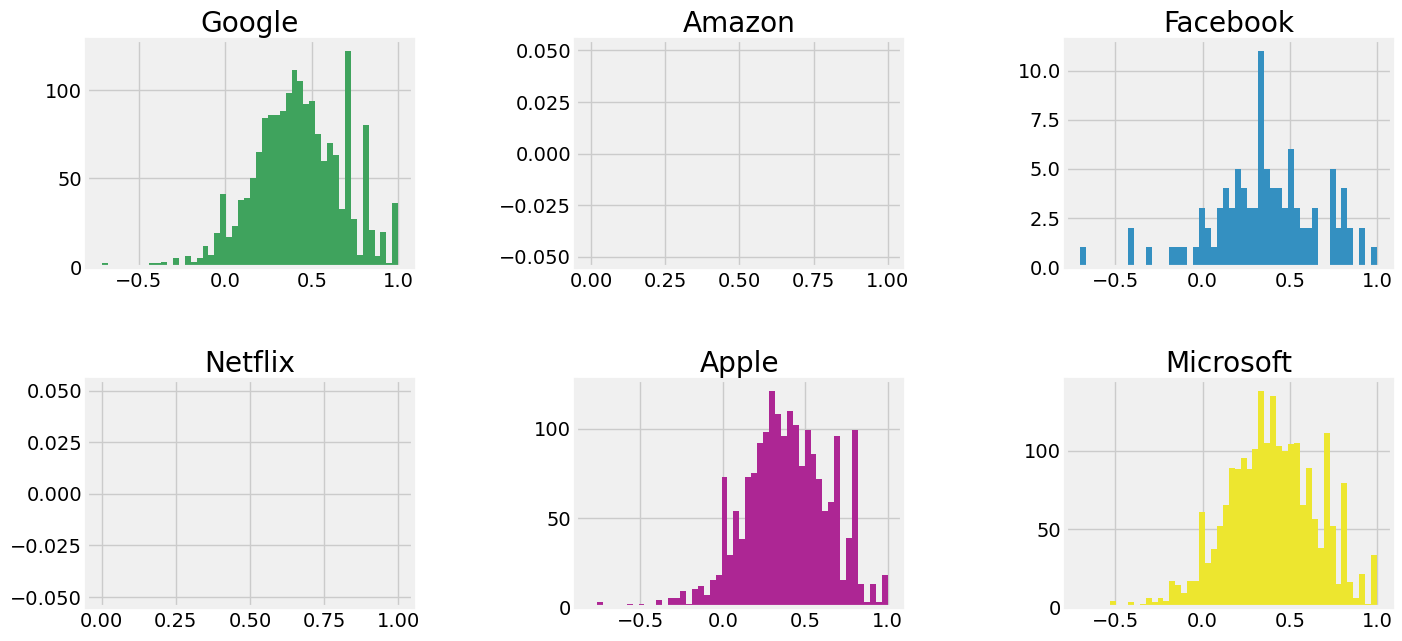

In [32]:
import matplotlib.pyplot as plt

# Your data and color definitions
# ...

# Create the first figure with a transparent background
plt.figure(1, figsize=(15, 4))
plt.gcf().set_facecolor((1.0, 1.0, 1.0, 0.0))  # Set the background color to fully transparent
plt.hist(df['summary_polarity'], bins=50)

# Create the second figure with a transparent background for subplots
plt.figure(2, figsize=(15, 7))
plt.gcf().set_facecolor((1.0, 1.0, 1.0, 0.0))  # Set the background color to fully transparent

n = 0
for comp, c in zip(index_companies, colors):
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.hist(df['summary_polarity'][df['firm'] == comp], bins=50, color=c)
    plt.title(comp)

# Display the plots
plt.show()


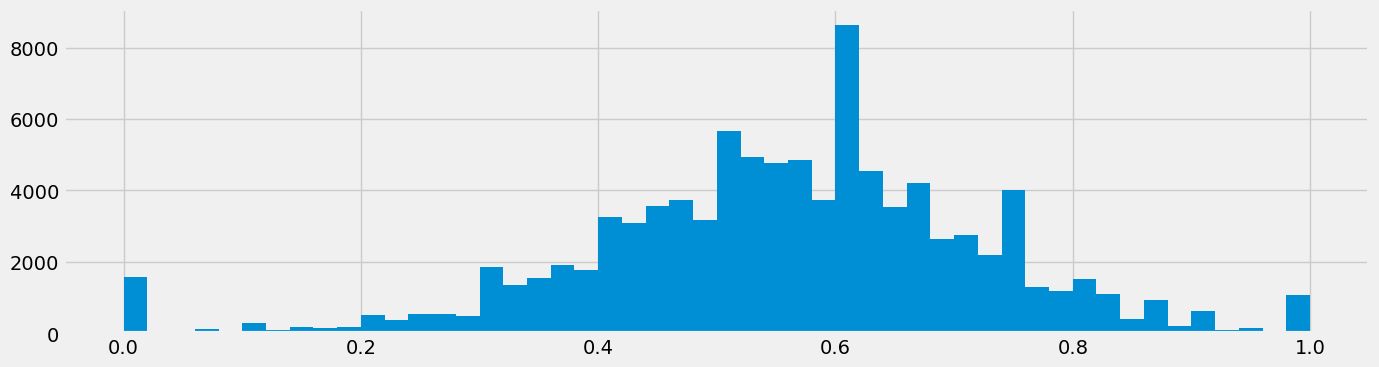

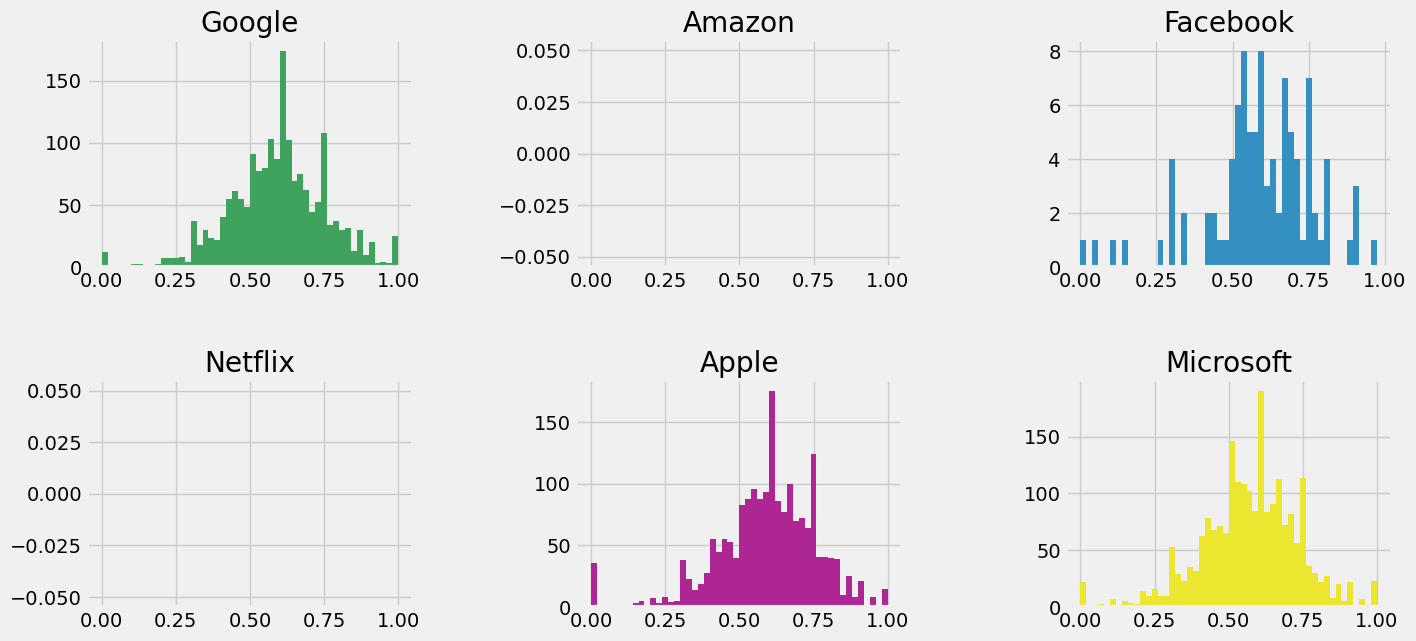

In [105]:
plt.figure(1 , figsize = (15 , 4))
plt.hist(df['summary_subjectivity'] , bins = 50)


plt.figure(2 , figsize = (15 , 7))
n = 0 
for comp , c in zip(index_companies , colors):
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.hist(df['summary_subjectivity'][df['firm'] == comp] , bins = 50 , color = c )
    plt.title(comp)
plt.show()

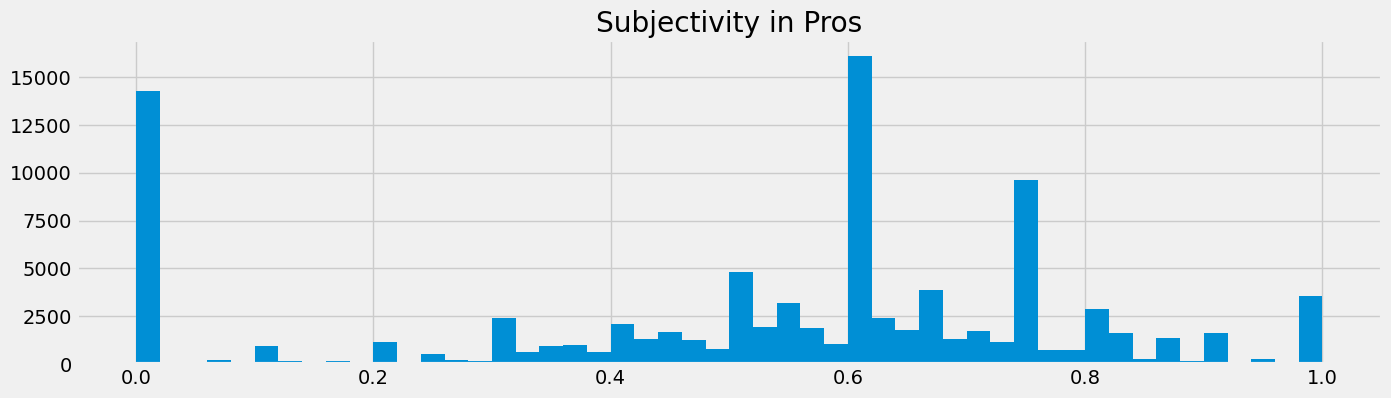

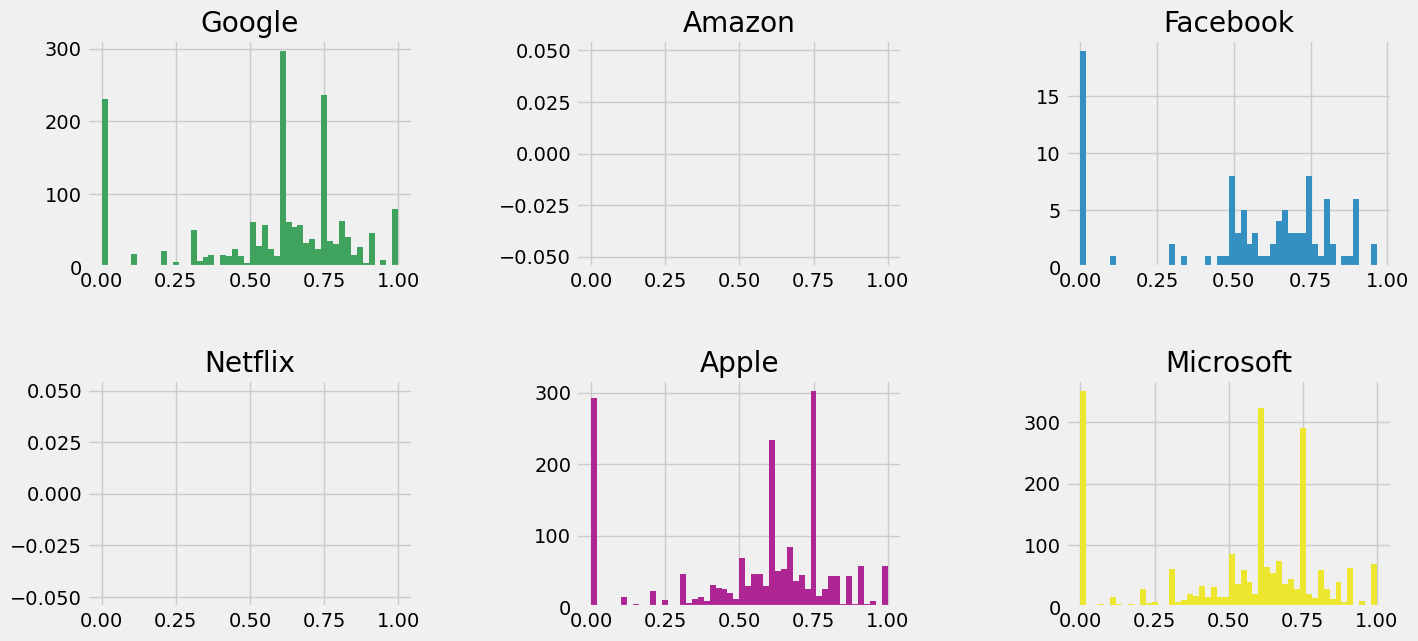

In [32]:
plt.figure(1 , figsize = (15 , 4))
plt.hist(df['pros_subjectivity'] , bins = 50)
plt.title('Subjectivity in Pros')

plt.figure(2 , figsize = (15 , 7))
n = 0 
for comp , c in zip(index_companies , colors):
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.hist(df['pros_subjectivity'][df['firm'] == comp] , bins = 50 , color = c)
    plt.title(comp)
plt.show()

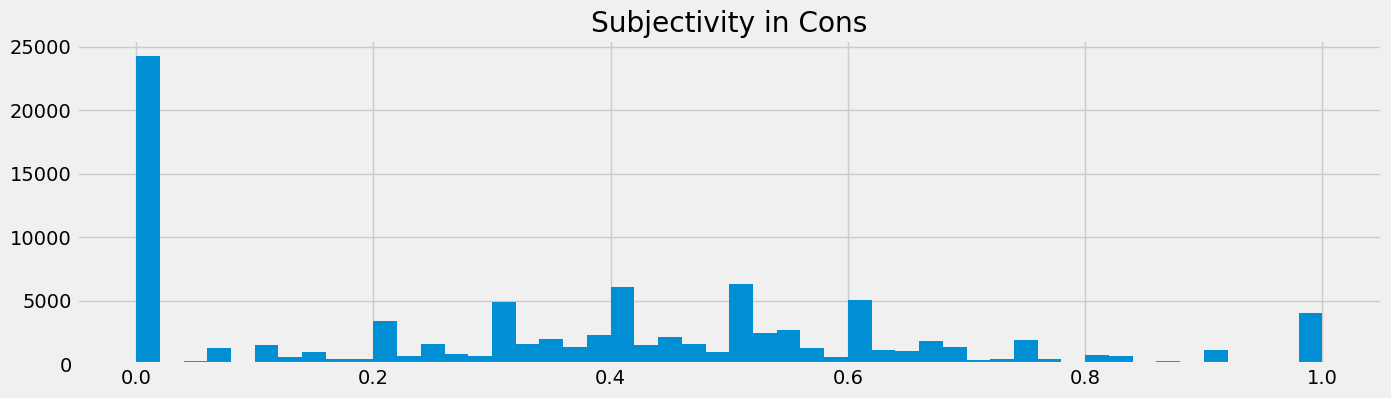

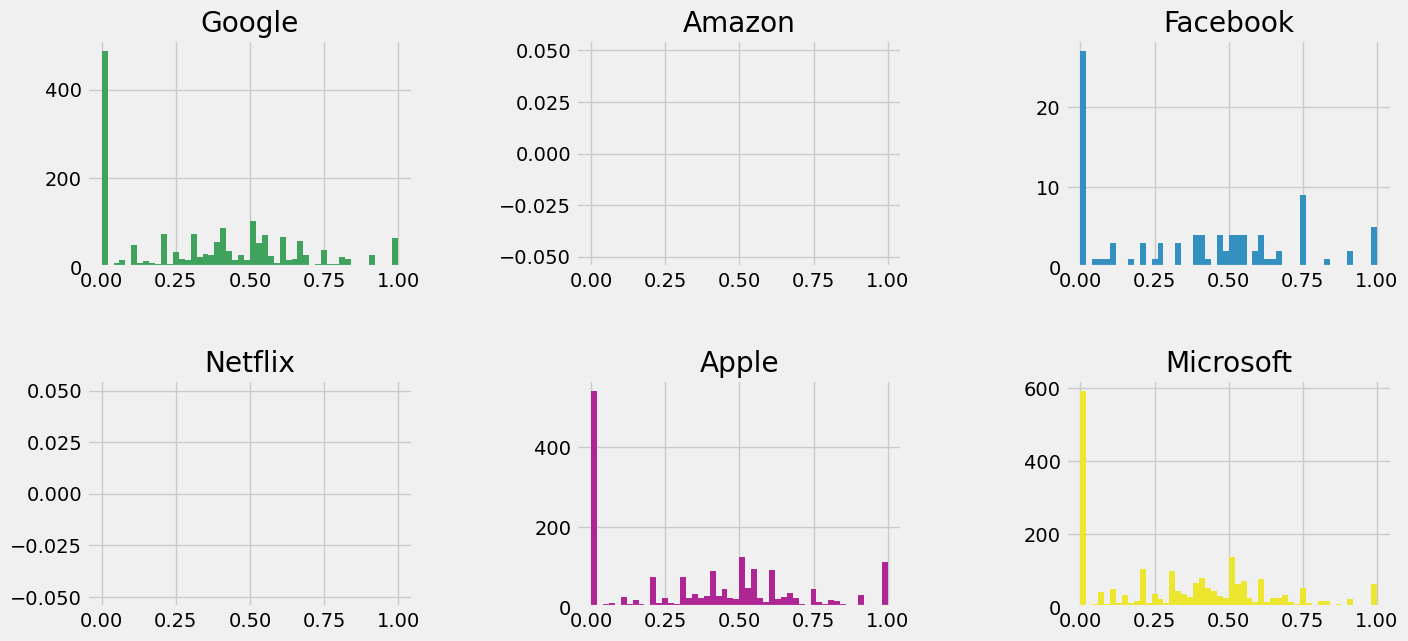

In [33]:
plt.figure(1 , figsize = (15 , 4))
plt.hist(df['cons_subjectivity'] , bins = 50)
plt.title('Subjectivity in Cons')

plt.figure(2 , figsize = (15 , 7))
n = 0 
for comp , c in zip(index_companies , colors):
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.hist(df['cons_subjectivity'][df['firm'] == comp] , bins = 50 , color = c)
    plt.title(comp)
plt.show()

In [34]:
df["overall_rating"].value_counts()

5    33474
4    31663
3    18464
2     6279
1     5453
Name: overall_rating, dtype: int64

In [35]:
stemmer = WordNetLemmatizer()
tok = TreebankWordTokenizer()

In [36]:
nltk.download('stopwords')
en_stop       = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sibik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def preprocess_transformers(document, full_process=True):
        document = re.sub(r'\W', ' ', str(document))
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        document = re.sub(r'^b\s+', '', document)
        document = document.lower()
        if full_process:
            tokens = document.split()
            tokens = [stemmer.lemmatize(word) for word in tokens]
            tokens = [word for word in tokens if word not in en_stop]
            tokens = [word for word in tokens if len(word) > 3]
            document = ' '.join(tokens)
        return document

In [38]:
df["summary"] = df[['summary']].applymap(lambda x: nltk.word_tokenize(preprocess_transformers(x, full_process=True)))

In [39]:
df.head()

,firm,summary,headline,pros,cons,overall_rating,summary_polarity,summary_subjectivity,pros_polarity,pros_subjectivity,cons_polarity,cons_subjectivity
0,AFH-Wealth-Management,"[people, make, destroy, place, great, people, ...",people make destroy place,great people excellent,poor pay huge gap pay senior management suppor...,2,0.320000,0.650000,0.900000,0.875000,2.775558e-17,0.750000
1,AFH-Wealth-Management,"[majority, people, lovely, thats, much, lower,...",low,majority people lovely thats pro,much lower market standard salary ladder pay i...,1,0.027778,0.438889,0.500000,0.750000,-3.571429e-02,0.414286
2,AFH-Wealth-Management,"[good, nice, environment, love, people, stress...",good,nice environment love people stressful,management clicky times,4,0.600000,0.733333,0.550000,0.800000,0.000000e+00,0.000000
3,AFH-Wealth-Management,"[review, great, people, heading, good, directi...",review,great people heading good direction generally,low salary middle management micro manage staf...,3,0.300000,0.390000,0.516667,0.616667,0.000000e+00,0.200000
4,AFH-Wealth-Management,"[terrible, avoid, like, plague, none, working,...",terrible avoid like plague,none lie working pay,unachievable bonus unfairly set manager bullyi...,1,-0.289000,0.624000,0.000000,0.000000,-2.100000e-01,0.582222


In [40]:
df[(df['summary_polarity'] >= 0.9)].sum()

firm                    ALDIALDIAQAASDAAccentureAccentureAccentureAcce...
summary                 [best, employee, best, company, worked, can, n...
headline                best employeeexcellent company workpayroll adm...
pros                    best company workedgood pay excellent workbest...
cons                    cannot think addkillerdisadvantage workingaren...
overall_rating                                                       4818
summary_polarity                                                  990.075
summary_subjectivity                                           676.237024
pros_polarity                                                  656.566667
pros_subjectivity                                                460.8875
cons_polarity                                                       158.9
cons_subjectivity                                                  109.15
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95333 entries, 0 to 103887
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   firm                  95333 non-null  object 
 1   summary               95333 non-null  object 
 2   headline              95333 non-null  object 
 3   pros                  95333 non-null  object 
 4   cons                  95333 non-null  object 
 5   overall_rating        95333 non-null  int64  
 6   summary_polarity      95333 non-null  float64
 7   summary_subjectivity  95333 non-null  float64
 8   pros_polarity         95333 non-null  float64
 9   pros_subjectivity     95333 non-null  float64
 10  cons_polarity         95333 non-null  float64
 11  cons_subjectivity     95333 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 9.5+ MB


In [42]:
def calculate_sentiment(df):
    if df['summary_polarity'] > 0.4:
        val = "Positive"
    elif df['summary_polarity'] >= 0.2:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [43]:
df['sentiment'] = df.apply(calculate_sentiment, axis=1)

In [44]:
df["sentiment"].value_counts()

Positive    36783
Neutral     29439
Negative    29111
Name: sentiment, dtype: int64

In [45]:
X = df["summary"]

In [46]:
y = df["sentiment"]

In [47]:
def plot_classification_report(test_y, predict_y, model_name):
    report = classification_report(test_y, predict_y)
    print("-" * 5, f"{model_name} - Classification Report", "-" * 5)
    print(report)

In [48]:
def process_logistic_regression(train_text, y_train, test_text, y_test, vectorizer_name):
    C = [10 ** x for x in range(-5, 1)]
    cv_log_error_array = []
    
    for i in C:
        clf = LogisticRegression(C=i, penalty='l2', solver='lbfgs', random_state=42)
        clf.fit(train_text, y_train)

        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_text, y_train)

        predict_y = sig_clf.predict_proba(test_text)
        cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

        print('For Values of C =', i, "The Log Loss is:", log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    plt.figure(figsize=(20, 7))
    fig, ax = plt.subplots()
    ax.plot(C, cv_log_error_array, c='r')
    for i, txt in enumerate(np.round(cv_log_error_array, 3)):
        ax.annotate((C[i], np.round(txt, 3)), (C[i], cv_log_error_array[i]))

    plt.grid()
    plt.title("{0} - Cross Validation Error for Each C".format(vectorizer_name))
    plt.xlabel("C's")
    plt.ylabel("Error Measure")
    plt.show()

    best_C = np.argmin(cv_log_error_array)

    clf = LogisticRegression(C=C[best_C], penalty='l2', solver='lbfgs', random_state=42)
    clf.fit(train_text, y_train)

    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)

    predict_y = lr_sig_clf.predict_proba(train_text)
    print('{0} - For Values of Best C ='.format(vectorizer_name), C[best_C], "The Train Log Loss is:",
          log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

    predict_y = lr_sig_clf.predict_proba(test_text)
    print('{0} - For Values of Best C ='.format(vectorizer_name), C[best_C], "The Cross Validation Log Loss is:",
          log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    lr_train_accuracy = (lr_sig_clf.score(train_text, y_train) * 100)
    lr_cv_accuracy = (lr_sig_clf.score(test_text, y_test) * 100)

    print("{0} - Logistic Regression Train Accuracy -".format(vectorizer_name), lr_train_accuracy)
    print("{0} - Logistic Regression Test Accuracy -".format(vectorizer_name), lr_cv_accuracy)

    plot_classification_report(y_test, lr_sig_clf.predict(test_text), vectorizer_name + " - Logistic Regression")


In [49]:
def process_svm(train_text, y_train, test_text, y_test, vectorizer_name):
    C = [10 ** x for x in range(-5, 1)]
    cv_log_error_array = []
    
    for i in C:
        clf = SVC(C=i, kernel='linear', random_state=42)
        clf.fit(train_text, y_train)

        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_text, y_train)

        predict_y = sig_clf.predict_proba(test_text)
        cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

        print('For Values of C =', i, "The Log Loss is:", log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    plt.figure(figsize=(20, 7))
    fig, ax = plt.subplots()
    ax.plot(C, cv_log_error_array, c='r')
    for i, txt in enumerate(np.round(cv_log_error_array, 3)):
        ax.annotate((C[i], np.round(txt, 3)), (C[i], cv_log_error_array[i]))

    plt.grid()
    plt.title("{0} - Cross Validation Error for Each C".format(vectorizer_name))
    plt.xlabel("C's")
    plt.ylabel("Error Measure")
    plt.show()

    best_C = np.argmin(cv_log_error_array)

    clf = SVC(C=C[best_C], kernel='linear', random_state=42)
    clf.fit(train_text, y_train)

    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)

    predict_y = lr_sig_clf.predict_proba(train_text)
    print('{0} - For Values of Best C ='.format(vectorizer_name), C[best_C], "The Train Log Loss is:",
          log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

    predict_y = lr_sig_clf.predict_proba(test_text)
    print('{0} - For Values of Best C ='.format(vectorizer_name), C[best_C], "The Cross Validation Log Loss is:",
          log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    lr_train_accuracy = (lr_sig_clf.score(train_text, y_train) * 100)
    lr_cv_accuracy = (lr_sig_clf.score(test_text, y_test) * 100)

    print("{0} - SVM Train Accuracy -".format(vectorizer_name), lr_train_accuracy)
    print("{0} - SVM Test Accuracy -".format(vectorizer_name), lr_cv_accuracy)

    plot_classification_report(y_test, lr_sig_clf.predict(test_text), vectorizer_name + " - SVM")


In [50]:
def process_naive_bayes(train_text, y_train, test_text, y_test, vectorizer_name):
    alpha = [10 ** x for x in range(-5, 1)]
    cv_log_error_array = []

    for i in alpha:
        clf = MultinomialNB(alpha=i)
        clf.fit(train_text, y_train)

        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_text, y_train)

        predict_y = sig_clf.predict_proba(test_text)
        cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

        print('For Values of Alpha =', i, "The Log Loss is:", log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    plt.figure(figsize=(20, 7))
    fig, ax = plt.subplots()
    ax.plot(alpha, cv_log_error_array, c='r')
    for i, txt in enumerate(np.round(cv_log_error_array, 3)):
        ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))

    plt.grid()
    plt.title("{0} - Cross Validation Error for Each Alpha".format(vectorizer_name))
    plt.xlabel("Alpha i's")
    plt.ylabel("Error Measure")
    plt.show()

    best_alpha = np.argmin(cv_log_error_array)

    clf = MultinomialNB(alpha=alpha[best_alpha])
    clf.fit(train_text, y_train)

    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)

    predict_y = lr_sig_clf.predict_proba(train_text)
    print('{0} - For Values of Best Alpha ='.format(vectorizer_name), alpha[best_alpha], "The Train Log Loss is:",
          log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

    predict_y = lr_sig_clf.predict_proba(test_text)
    print('{0} - For Values of Best Alpha ='.format(vectorizer_name), alpha[best_alpha],
          "The Cross Validation Log Loss is:", log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    lr_train_accuracy = (lr_sig_clf.score(train_text, y_train) * 100)
    lr_cv_accuracy = (lr_sig_clf.score(test_text, y_test) * 100)

    print("{0} - Naive Bayes Train Accuracy -".format(vectorizer_name), lr_train_accuracy)
    print("{0} - Naive Bayes Test Accuracy -".format(vectorizer_name), lr_cv_accuracy)

    plot_classification_report(y_test, lr_sig_clf.predict(test_text), vectorizer_name + " - Naive Bayes")


In [51]:
def process_sgd_classifier(train_text, y_train, test_text, y_test, vectorizer_name):
    alpha = [10 ** x for x in range(-5, 1)]
    cv_log_error_array=[]
    for i in alpha:
        clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
        clf.fit(train_text, y_train)

        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_text, y_train)

        predict_y = sig_clf.predict_proba(test_text)
        cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

        print('For Values of Alpha =',i,"The Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    plt.figure(figsize=(20,7))
    fig, ax = plt.subplots()
    ax.plot(alpha, cv_log_error_array, c='r')
    for i, txt in enumerate(np.round(cv_log_error_array,3)):
        ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))

    plt.grid()
    plt.title("{0} - Cross Validation Error for Each Alpha".format(vectorizer_name))
    plt.xlabel("Alpha i's")
    plt.ylabel("Error Measure")
    plt.show()

    best_alpha = np.argmin(cv_log_error_array)

    clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
    clf.fit(train_text, y_train)

    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)

    predict_y = lr_sig_clf.predict_proba(train_text)
    print('{0} - For Values of Best Alpha ='.format(vectorizer_name), alpha[best_alpha],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

    predict_y = lr_sig_clf.predict_proba(test_text)
    print('{0} - For Values of Best Alpha ='.format(vectorizer_name), alpha[best_alpha],"The Cross Validation Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
    lr_train_accuracy = (lr_sig_clf.score(train_text, y_train)*100)
    lr_cv_accuracy = (lr_sig_clf.score(test_text, y_test)*100)

    print("{0} - SGD Classiifier Train Accuracy -".format(vectorizer_name),lr_train_accuracy)
    print("{0} - SGD Classiifier Test Accuracy -".format(vectorizer_name),lr_cv_accuracy)
    
    plot_classification_report(y_test, lr_sig_clf.predict(test_text.toarray()), vectorizer_name+" - SGD Classifier")

In [52]:
def process_rf_classifier(train_text, y_train, test_text, y_test, vectorizer_name):
    n_estimators = [200,400,600,800,1000]
    cv_log_error_array=[]
    for i in n_estimators:
        clf = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= i, max_depth=8, criterion='gini')
        clf.fit(train_text, y_train)

        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_text, y_train)

        predict_y = sig_clf.predict_proba(test_text)
        cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

        print('For Values of Estimator =',i,"The Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    plt.figure(figsize=(20,7))
    fig, ax = plt.subplots()
    ax.plot(n_estimators, cv_log_error_array, c='r')
    for i, txt in enumerate(np.round(cv_log_error_array,3)):
        ax.annotate((n_estimators[i],np.round(txt,3)), (n_estimators[i],cv_log_error_array[i]))

    plt.grid()
    plt.title("{0} - Cross Validation Error for Each Estimator".format(vectorizer_name))
    plt.xlabel("n_estimators i's")
    plt.ylabel("Error Measure")
    plt.show()

    best_estimator = np.argmin(cv_log_error_array)
    print(best_estimator)
    print(n_estimators[best_estimator])
    clf = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= n_estimators[best_estimator], max_depth=8, criterion='gini')
    clf.fit(train_text, y_train)

    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)

    predict_y = lr_sig_clf.predict_proba(train_text)
    print('{0} - For Values of Best Estimator ='.format(vectorizer_name), n_estimators[best_estimator],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

    predict_y = lr_sig_clf.predict_proba(test_text)
    print('{0} - For Values of Best Estimator ='.format(vectorizer_name), n_estimators[best_estimator],"The Cross Validation Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
    lr_train_accuracy = (lr_sig_clf.score(train_text, y_train)*100)
    lr_cv_accuracy = (lr_sig_clf.score(test_text, y_test)*100)

    print("{0} - Random Forest Classiifier Train Accuracy -".format(vectorizer_name),lr_train_accuracy)
    print("{0} - Random Forest Classiifier Test Accuracy -".format(vectorizer_name),lr_cv_accuracy)
    
    plot_classification_report(y_test, lr_sig_clf.predict(test_text.toarray()), vectorizer_name+" - Random Forest Classifier")

In [53]:
def process_ada_classifier(train_text, y_train, test_text, y_test, vectorizer_name):
    n_estimators = [200,400,600,800,1000]
    learning_rate_value  = [0.5,1.0,1.5,2.0,2.5]
    cv_log_error_array=[]
    for idx, i in enumerate(n_estimators):
        clf = AdaBoostClassifier(random_state=42, learning_rate=learning_rate_value[idx], n_estimators= i)
        clf.fit(train_text, y_train)

        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_text, y_train)

        predict_y = sig_clf.predict_proba(test_text)
        cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

        print('For Values of Estimator =',i,"The Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    plt.figure(figsize=(20,7))
    fig, ax = plt.subplots()
    ax.plot(n_estimators, cv_log_error_array, c='r')
    for i, txt in enumerate(np.round(cv_log_error_array,3)):
        ax.annotate((n_estimators[i],np.round(txt,3)), (n_estimators[i],cv_log_error_array[i]))

    plt.grid()
    plt.title("{0} - Cross Validation Error for Each Estimator".format(vectorizer_name))
    plt.xlabel("n_estimators i's")
    plt.ylabel("Error Measure")
    plt.show()

    best_estimator = np.argmin(cv_log_error_array)

    clf = AdaBoostClassifier(random_state=42, learning_rate=1, n_estimators= n_estimators[best_estimator])
    clf.fit(train_text, y_train)

    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)

    predict_y = lr_sig_clf.predict_proba(train_text)
    print('{0} - For Values of Best Estimator ='.format(vectorizer_name), n_estimators[best_estimator],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

    predict_y = lr_sig_clf.predict_proba(test_text)
    print('{0} - For Values of Best Estimator ='.format(vectorizer_name), n_estimators[best_estimator],"The Cross Validation Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
    lr_train_accuracy = (lr_sig_clf.score(train_text, y_train)*100)
    lr_cv_accuracy = (lr_sig_clf.score(test_text, y_test)*100)

    print("{0} - Ada Boost Classiifier Train Accuracy -".format(vectorizer_name),lr_train_accuracy)
    print("{0} - Ada Boost Classiifier Test Accuracy -".format(vectorizer_name),lr_cv_accuracy)
    
    plot_classification_report(y_test, lr_sig_clf.predict(test_text.toarray()), vectorizer_name+" - Ada Boost Classifier")

In [54]:
def process_gradient_boosting_classifier(train_text, y_train, test_text, y_test, vectorizer_name):
    n_estimators = [200,400,600,800,1000]
    learning_rate_value  = [0.5,1.0,1.5,2.0,2.5]
    cv_log_error_array=[]
    for idx, i in enumerate(n_estimators):
        clf = GradientBoostingClassifier(random_state=42, learning_rate=learning_rate_value[idx], n_estimators= i)
        clf.fit(train_text, y_train)

        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_text, y_train)

        predict_y = sig_clf.predict_proba(test_text)
        cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

        print('For Values of Estimator =',i,"The Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    plt.figure(figsize=(20,7))
    fig, ax = plt.subplots()
    ax.plot(n_estimators, cv_log_error_array, c='r')
    for i, txt in enumerate(np.round(cv_log_error_array,3)):
        ax.annotate((n_estimators[i],np.round(txt,3)), (n_estimators[i],cv_log_error_array[i]))

    plt.grid()
    plt.title("{0} - Cross Validation Error for Each Estimator".format(vectorizer_name))
    plt.xlabel("n_estimators i's")
    plt.ylabel("Error Measure")
    plt.show()

    best_estimator = np.argmin(cv_log_error_array)

    clf = GradientBoostingClassifier(random_state=42, learning_rate=1, n_estimators= n_estimators[best_estimator])
    clf.fit(train_text, y_train)

    lr_sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    lr_sig_clf.fit(train_text, y_train)

    predict_y = lr_sig_clf.predict_proba(train_text)
    print('{0} - For Values of Best Estimator ='.format(vectorizer_name), n_estimators[best_estimator],"The Train Log Loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

    predict_y = lr_sig_clf.predict_proba(test_text)
    print('{0} - For Values of Best Estimator ='.format(vectorizer_name), n_estimators[best_estimator],"The Cross Validation Log Loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
    lr_train_accuracy = (lr_sig_clf.score(train_text, y_train)*100)
    lr_cv_accuracy = (lr_sig_clf.score(test_text, y_test)*100)

    print("{0} - Gradient Boosting Classiifier Train Accuracy -".format(vectorizer_name),lr_train_accuracy)
    print("{0} - Gradient Boosting Classiifier Test Accuracy -".format(vectorizer_name),lr_cv_accuracy)
    
    plot_classification_report(y_test, lr_sig_clf.predict(test_text.toarray()), vectorizer_name+" - Gradient Boosting Classifier")

In [55]:
#BOW
X = X.apply(lambda x: ' '.join(x))

In [56]:
text_vectorizer = CountVectorizer(min_df=1)

In [57]:
text_cvec = text_vectorizer.fit_transform(X)

In [58]:
text_features = text_vectorizer.get_feature_names()

C:\Users\sibik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [59]:
text_features

['abandon',
 'abandoned',
 'abandonment',
 'abbey',
 'abduct',
 'aberration',
 'abhorrent',
 'abhorrently',
 'abide',
 'abiding',
 'ability',
 'abject',
 'able',
 'ablest',
 'abnormal',
 'abnormally',
 'aboard',
 'abolish',
 'abound',
 'abouts',
 'abrasive',
 'abreast',
 'abroad',
 'abrogation',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent',
 'absentee',
 'absenteeism',
 'absolute',
 'absolutely',
 'absolve',
 'absorb',
 'absorbed',
 'absorbing',
 'abstract',
 'absurd',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abuser',
 'abusive',
 'abut',
 'abysmal',
 'abysmally',
 'academic',
 'academically',
 'academy',
 'acca',
 'accelerate',
 'accelerated',
 'acceleration',
 'accelerator',
 'accent',
 'accept',
 'acceptability',
 'acceptable',
 'acceptance',
 'accepted',
 'acceptive',
 'access',
 'accessibility',
 'accessible',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acclimate',
 'accommodate',
 'accommodating',
 'accommodation',
 'accommo

In [60]:
text_feature_counts = text_cvec.sum(axis=0).A1

In [61]:
text_feature_counts

array([ 2, 11,  3, ...,  4, 88, 19], dtype=int64)

In [62]:
text_features_dict = dict(zip(list(text_features),text_feature_counts))

In [63]:
print("Total Number of Unique Words in Train Data :",len(text_features))

Total Number of Unique Words in Train Data : 11689


In [64]:
text_cvec = normalize(text_cvec, axis=0)

In [65]:
print("Shape of Matrix After One Hot Encoding")
print(text_cvec.shape)

Shape of Matrix After One Hot Encoding
(95333, 11689)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(text_cvec, y, test_size=0.20, stratify=y, random_state=0)

For Values of C = 1e-05 The Log Loss is: 0.9002219923043856
For Values of C = 0.0001 The Log Loss is: 0.9011906506068306
For Values of C = 0.001 The Log Loss is: 0.9007204653200366
For Values of C = 0.01 The Log Loss is: 0.8966537760087676
For Values of C = 0.1 The Log Loss is: 0.8688455429334422


C:\Users\sibik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For Values of C = 1 The Log Loss is: 0.7846969026180185


<Figure size 2000x700 with 0 Axes>

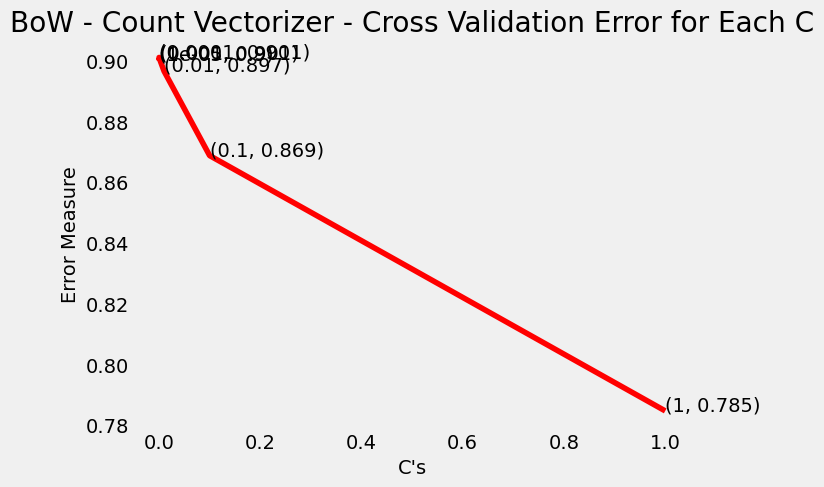

C:\Users\sibik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BoW - Count Vectorizer - For Values of Best C = 1 The Train Log Loss is: 0.7160719598240259
BoW - Count Vectorizer - For Values of Best C = 1 The Cross Validation Log Loss is: 0.7846969026180185
BoW - Count Vectorizer - Logistic Regression Train Accuracy - 72.73359032858679
BoW - Count Vectorizer - Logistic Regression Test Accuracy - 67.14742749252636
----- BoW - Count Vectorizer - Logistic Regression - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.69      0.74      0.71      5822
     Neutral       0.59      0.35      0.44      5888
    Positive       0.69      0.87      0.77      7357

    accuracy                           0.67     19067
   macro avg       0.66      0.65      0.64     19067
weighted avg       0.66      0.67      0.65     19067



In [86]:
process_logistic_regression(X_train, y_train, X_test, y_test, "BoW - Count Vectorizer")

For Values of C = 1e-05 The Log Loss is: 1.0078999248601255
For Values of C = 0.0001 The Log Loss is: 0.9520906208876528
For Values of C = 0.001 The Log Loss is: 0.8981276184302024
For Values of C = 0.01 The Log Loss is: 0.9037955275053484
For Values of C = 0.1 The Log Loss is: 0.9391349287449666
For Values of C = 1 The Log Loss is: 0.9412910476991244


<Figure size 2000x700 with 0 Axes>

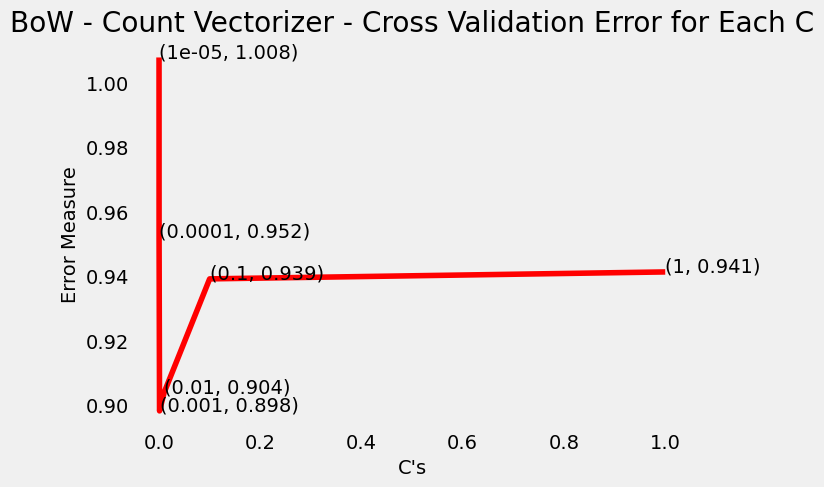

BoW - Count Vectorizer - For Values of Best C = 0.001 The Train Log Loss is: 0.8451175839236477
BoW - Count Vectorizer - For Values of Best C = 0.001 The Cross Validation Log Loss is: 0.8981276184302024
BoW - Count Vectorizer - SVM Train Accuracy - 63.3388403744788
BoW - Count Vectorizer - SVM Test Accuracy - 58.63009387947763
----- BoW - Count Vectorizer - SVM - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.63      0.54      0.59      5822
     Neutral       0.48      0.30      0.37      5888
    Positive       0.60      0.85      0.70      7357

    accuracy                           0.59     19067
   macro avg       0.57      0.56      0.55     19067
weighted avg       0.57      0.59      0.56     19067



In [91]:
process_svm(X_train, y_train, X_test, y_test, "BoW - Count Vectorizer")

For Values of Alpha = 1e-05 The Log Loss is: 1.0627500964996175
For Values of Alpha = 0.0001 The Log Loss is: 1.0625180110315324
For Values of Alpha = 0.001 The Log Loss is: 1.061344695387178
For Values of Alpha = 0.01 The Log Loss is: 1.05732312614762
For Values of Alpha = 0.1 The Log Loss is: 1.0442499233609916
For Values of Alpha = 1 The Log Loss is: 0.9881400915903374


<Figure size 2000x700 with 0 Axes>

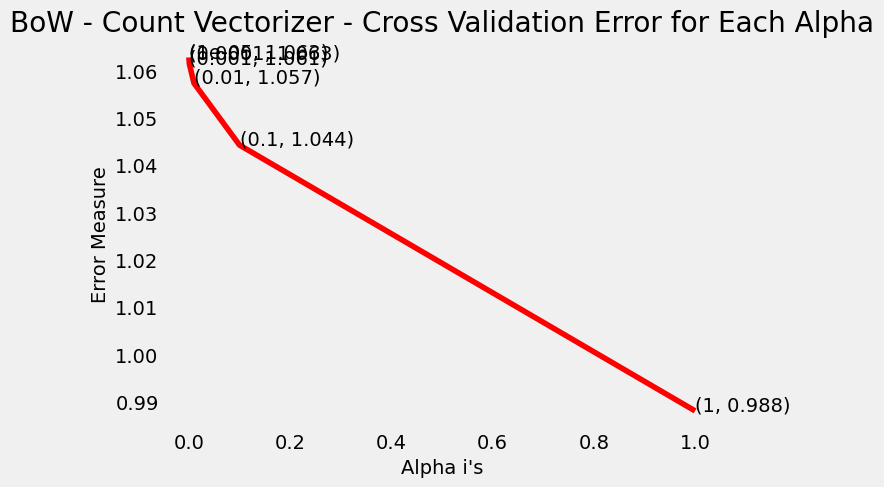

BoW - Count Vectorizer - For Values of Best Alpha = 1 The Train Log Loss is: 0.8889587859492032
BoW - Count Vectorizer - For Values of Best Alpha = 1 The Cross Validation Log Loss is: 0.9881400915903374
BoW - Count Vectorizer - Naive Bayes Train Accuracy - 61.893897673930724
BoW - Count Vectorizer - Naive Bayes Test Accuracy - 54.371427072953274
----- BoW - Count Vectorizer - Naive Bayes - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.61      0.52      0.56      5822
     Neutral       0.45      0.14      0.22      5888
    Positive       0.53      0.88      0.66      7357

    accuracy                           0.54     19067
   macro avg       0.53      0.52      0.48     19067
weighted avg       0.53      0.54      0.49     19067



In [194]:
process_naive_bayes(X_train, y_train, X_test, y_test, "BoW - Count Vectorizer")

For Values of Alpha = 1e-05 The Log Loss is: 0.7690415421411252
For Values of Alpha = 0.0001 The Log Loss is: 0.8659080413015923
For Values of Alpha = 0.001 The Log Loss is: 0.8964698821478151
For Values of Alpha = 0.01 The Log Loss is: 0.9047360973506817
For Values of Alpha = 0.1 The Log Loss is: 0.8980463677565967
For Values of Alpha = 1 The Log Loss is: 0.9553657652544468


<Figure size 2000x700 with 0 Axes>

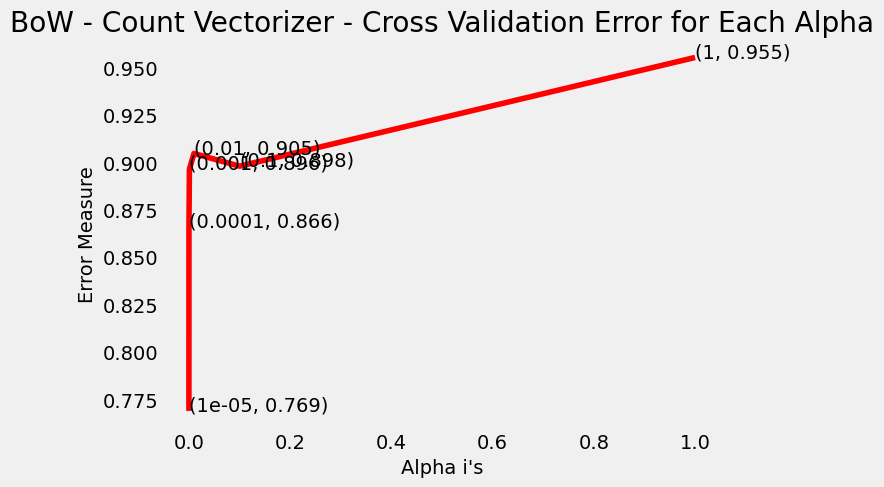

BoW - Count Vectorizer - For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.6914921285150303
BoW - Count Vectorizer - For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.7690415421411252
BoW - Count Vectorizer - SGD Classiifier Train Accuracy - 72.90535756431437
BoW - Count Vectorizer - SGD Classiifier Test Accuracy - 66.74358839880422
----- BoW - Count Vectorizer - SGD Classifier - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.74      0.63      0.68      5822
     Neutral       0.55      0.45      0.49      5888
    Positive       0.69      0.87      0.77      7357

    accuracy                           0.67     19067
   macro avg       0.66      0.65      0.65     19067
weighted avg       0.66      0.67      0.66     19067



In [101]:
process_sgd_classifier(X_train, y_train, X_test, y_test, "BoW - Count Vectorizer")

For Values of Estimator = 200 The Log Loss is: 0.7563909836205929
For Values of Estimator = 400 The Log Loss is: 0.7344370112335277
For Values of Estimator = 600 The Log Loss is: 0.7343758392422952
For Values of Estimator = 800 The Log Loss is: 0.7348733206791046
For Values of Estimator = 1000 The Log Loss is: 0.7313650757677674


<Figure size 2000x700 with 0 Axes>

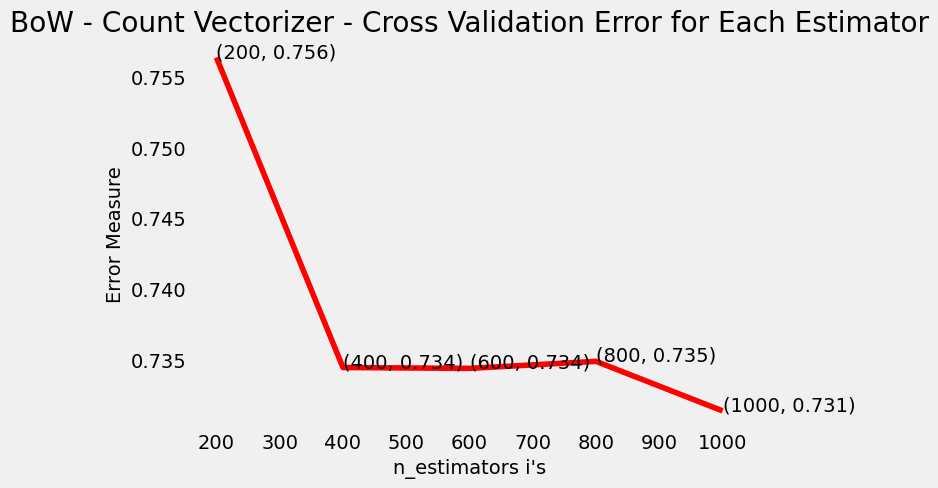

4
1000
BoW - Count Vectorizer - For Values of Best Estimator = 1000 The Train Log Loss is: 0.699241062158264
BoW - Count Vectorizer - For Values of Best Estimator = 1000 The Cross Validation Log Loss is: 0.7313650757677674
BoW - Count Vectorizer - Random Forest Classiifier Train Accuracy - 70.1164345842184
BoW - Count Vectorizer - Random Forest Classiifier Test Accuracy - 67.42014999737766
----- BoW - Count Vectorizer - Random Forest Classifier - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.68      0.76      0.72      5822
     Neutral       0.60      0.37      0.46      5888
    Positive       0.70      0.85      0.77      7357

    accuracy                           0.67     19067
   macro avg       0.66      0.66      0.65     19067
weighted avg       0.66      0.67      0.66     19067



In [102]:
process_rf_classifier(X_train, y_train, X_test, y_test, "BoW - Count Vectorizer")

For Values of Estimator = 200 The Log Loss is: 0.6740392579119893
For Values of Estimator = 400 The Log Loss is: 0.6329549225625543
For Values of Estimator = 600 The Log Loss is: 0.6448203885493492
For Values of Estimator = 800 The Log Loss is: 1.092542107928373
For Values of Estimator = 1000 The Log Loss is: 1.0655529214013193


<Figure size 2000x700 with 0 Axes>

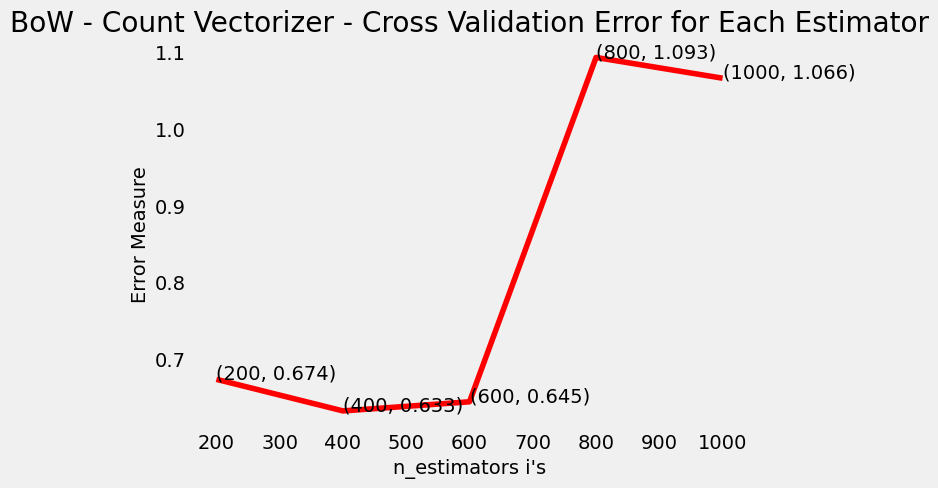

BoW - Count Vectorizer - For Values of Best Estimator = 400 The Train Log Loss is: 0.6184264623767463
BoW - Count Vectorizer - For Values of Best Estimator = 400 The Cross Validation Log Loss is: 0.6329549225625543
BoW - Count Vectorizer - Ada Boost Classiifier Train Accuracy - 77.41457530223165
BoW - Count Vectorizer - Ada Boost Classiifier Test Accuracy - 76.829076414748
----- BoW - Count Vectorizer - Ada Boost Classifier - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.73      0.92      0.82      5822
     Neutral       0.81      0.40      0.53      5888
    Positive       0.78      0.95      0.86      7357

    accuracy                           0.77     19067
   macro avg       0.78      0.75      0.74     19067
weighted avg       0.78      0.77      0.74     19067



In [105]:
process_ada_classifier(X_train, y_train, X_test, y_test, "BoW - Count Vectorizer")

For Values of Estimator = 200 The Log Loss is: 0.5912243814084587
For Values of Estimator = 400 The Log Loss is: 0.7833245402942935
For Values of Estimator = 600 The Log Loss is: 0.9582423750993018
For Values of Estimator = 800 The Log Loss is: 1.0664158681906595
For Values of Estimator = 1000 The Log Loss is: 1.0925421088861542


<Figure size 2000x700 with 0 Axes>

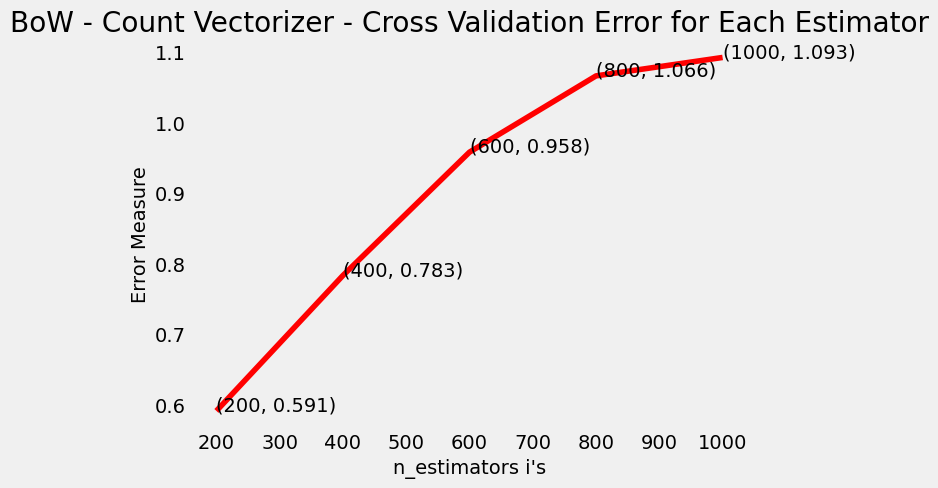

BoW - Count Vectorizer - For Values of Best Estimator = 200 The Train Log Loss is: 0.5962927709393938
BoW - Count Vectorizer - For Values of Best Estimator = 200 The Cross Validation Log Loss is: 0.6354901927112759
BoW - Count Vectorizer - Gradient Boosting Classiifier Train Accuracy - 85.06018409251828
BoW - Count Vectorizer - Gradient Boosting Classiifier Test Accuracy - 79.8552472858866
----- BoW - Count Vectorizer - Gradient Boosting Classifier - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83      5822
     Neutral       0.77      0.58      0.66      5888
    Positive       0.80      0.94      0.87      7357

    accuracy                           0.80     19067
   macro avg       0.80      0.79      0.79     19067
weighted avg       0.80      0.80      0.79     19067



In [107]:
process_gradient_boosting_classifier(X_train, y_train, X_test, y_test, "BoW - Count Vectorizer")

In [67]:
#TF_IDF
tf_idf_vectorizer =TfidfVectorizer(min_df=3)

In [68]:
text_tf_idf_vec = tf_idf_vectorizer.fit_transform(X)

In [69]:
text_features = tf_idf_vectorizer.get_feature_names()

C:\Users\sibik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
text_features

['abandoned',
 'abandonment',
 'abide',
 'ability',
 'able',
 'abnormally',
 'aboard',
 'abound',
 'abrasive',
 'abreast',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbing',
 'absurd',
 'absurdly',
 'abundance',
 'abundant',
 'abuse',
 'abusive',
 'abysmal',
 'abysmally',
 'academic',
 'academically',
 'academy',
 'acca',
 'accelerate',
 'accelerated',
 'acceleration',
 'accelerator',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accommodate',
 'accommodating',
 'accommodation',
 'accommodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accord',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accountability',
 'accountable',
 'accountancy',
 'accountant',
 'accounting',
 'accredited',
 'accrual',
 'accrue',
 'accumulate',
 'accuracy',
 'accurate',
 'accurately',
 'accuse',
 'accused',
 'accustomed',
 'ache',
 'achievable',
 'ac

In [71]:
text_feature_counts = text_tf_idf_vec.sum(axis=0).A1

In [72]:
text_feature_counts

array([ 2.68533802,  1.04137817,  2.23551117, ...,  1.84693562,
       30.31350298,  4.17555459])

In [73]:
text_features_dict = dict(zip(list(text_features),text_feature_counts))

In [74]:
text_tf_idf_vec = normalize(text_tf_idf_vec, axis=0)

In [75]:
print("Shape of Matrix After One Hot Encoding")
print(text_cvec.shape)

Shape of Matrix After One Hot Encoding
(95333, 11689)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(text_cvec, y, test_size=0.20, stratify=y, random_state=0)

For Values of C = 1e-05 The Log Loss is: 0.9002219923043856
For Values of C = 0.0001 The Log Loss is: 0.9011906506068306
For Values of C = 0.001 The Log Loss is: 0.9007204653200366
For Values of C = 0.01 The Log Loss is: 0.8966537760087676
For Values of C = 0.1 The Log Loss is: 0.8688455429334422


C:\Users\sibik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For Values of C = 1 The Log Loss is: 0.7846969026180185


<Figure size 2000x700 with 0 Axes>

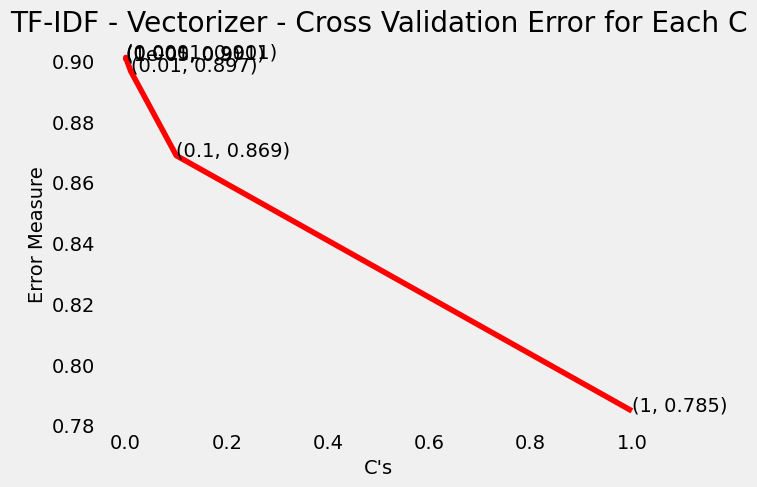

C:\Users\sibik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TF-IDF - Vectorizer - For Values of Best C = 1 The Train Log Loss is: 0.7160719598240259
TF-IDF - Vectorizer - For Values of Best C = 1 The Cross Validation Log Loss is: 0.7846969026180185
TF-IDF - Vectorizer - Logistic Regression Train Accuracy - 72.73359032858679
TF-IDF - Vectorizer - Logistic Regression Test Accuracy - 67.14742749252636
----- TF-IDF - Vectorizer - Logistic Regression - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.69      0.74      0.71      5822
     Neutral       0.59      0.35      0.44      5888
    Positive       0.69      0.87      0.77      7357

    accuracy                           0.67     19067
   macro avg       0.66      0.65      0.64     19067
weighted avg       0.66      0.67      0.65     19067



In [87]:
process_logistic_regression(X_train, y_train, X_test, y_test, "TF-IDF - Vectorizer")

For Values of C = 1e-05 The Log Loss is: 1.0078999248601255
For Values of C = 0.0001 The Log Loss is: 0.9520906208876528
For Values of C = 0.001 The Log Loss is: 0.8981276184302024
For Values of C = 0.01 The Log Loss is: 0.9037955275053484
For Values of C = 0.1 The Log Loss is: 0.9391349287449666
For Values of C = 1 The Log Loss is: 0.9412910476991244


<Figure size 2000x700 with 0 Axes>

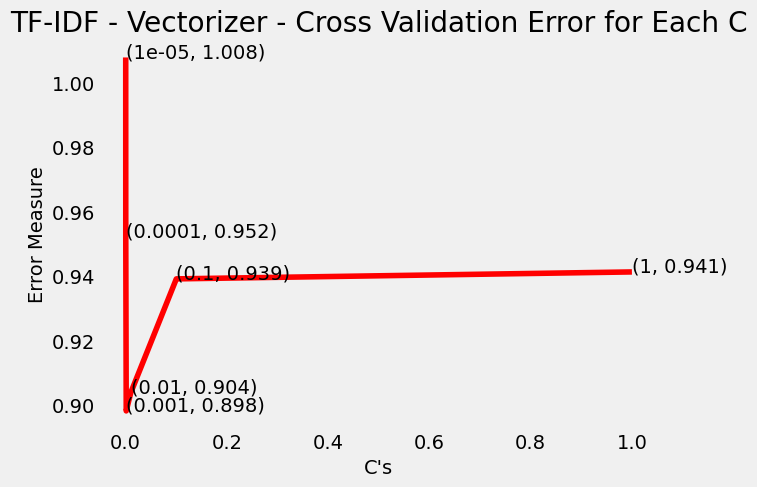

TF-IDF - Vectorizer - For Values of Best C = 0.001 The Train Log Loss is: 0.8451175839236477
TF-IDF - Vectorizer - For Values of Best C = 0.001 The Cross Validation Log Loss is: 0.8981276184302024
TF-IDF - Vectorizer - SVM Train Accuracy - 63.3388403744788
TF-IDF - Vectorizer - SVM Test Accuracy - 58.63009387947763
----- TF-IDF - Vectorizer - SVM - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.63      0.54      0.59      5822
     Neutral       0.48      0.30      0.37      5888
    Positive       0.60      0.85      0.70      7357

    accuracy                           0.59     19067
   macro avg       0.57      0.56      0.55     19067
weighted avg       0.57      0.59      0.56     19067



In [95]:
process_svm(X_train, y_train, X_test, y_test, "TF-IDF - Vectorizer")

For Values of Alpha = 1e-05 The Log Loss is: 1.0627500964996175
For Values of Alpha = 0.0001 The Log Loss is: 1.0625180110315324
For Values of Alpha = 0.001 The Log Loss is: 1.061344695387178
For Values of Alpha = 0.01 The Log Loss is: 1.05732312614762
For Values of Alpha = 0.1 The Log Loss is: 1.0442499233609916
For Values of Alpha = 1 The Log Loss is: 0.9881400915903374


<Figure size 2000x700 with 0 Axes>

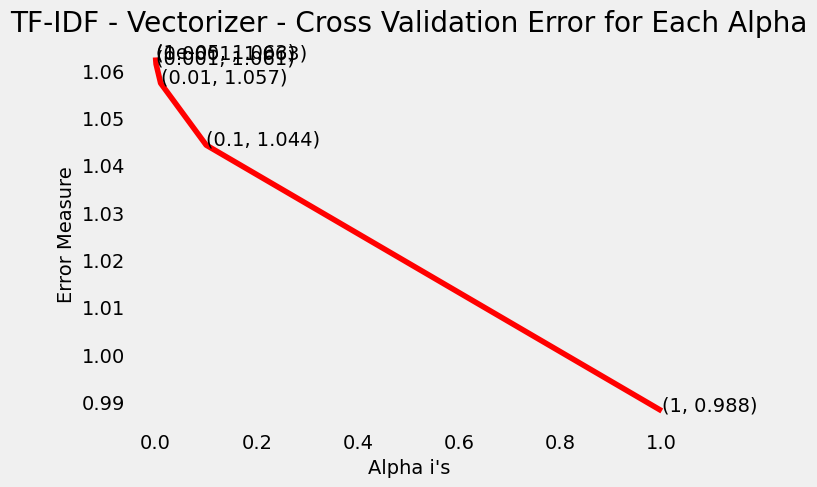

TF-IDF - Vectorizer - For Values of Best Alpha = 1 The Train Log Loss is: 0.8889587859492032
TF-IDF - Vectorizer - For Values of Best Alpha = 1 The Cross Validation Log Loss is: 0.9881400915903374
TF-IDF - Vectorizer - Naive Bayes Train Accuracy - 61.893897673930724
TF-IDF - Vectorizer - Naive Bayes Test Accuracy - 54.371427072953274
----- TF-IDF - Vectorizer - Naive Bayes - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.61      0.52      0.56      5822
     Neutral       0.45      0.14      0.22      5888
    Positive       0.53      0.88      0.66      7357

    accuracy                           0.54     19067
   macro avg       0.53      0.52      0.48     19067
weighted avg       0.53      0.54      0.49     19067



In [96]:
process_naive_bayes(X_train, y_train, X_test, y_test, "TF-IDF - Vectorizer")

For Values of Alpha = 1e-05 The Log Loss is: 0.7690415421411252
For Values of Alpha = 0.0001 The Log Loss is: 0.8659080413015923
For Values of Alpha = 0.001 The Log Loss is: 0.8964698821478151
For Values of Alpha = 0.01 The Log Loss is: 0.9047360973506817
For Values of Alpha = 0.1 The Log Loss is: 0.8980463677565967
For Values of Alpha = 1 The Log Loss is: 0.9553657652544468


<Figure size 2000x700 with 0 Axes>

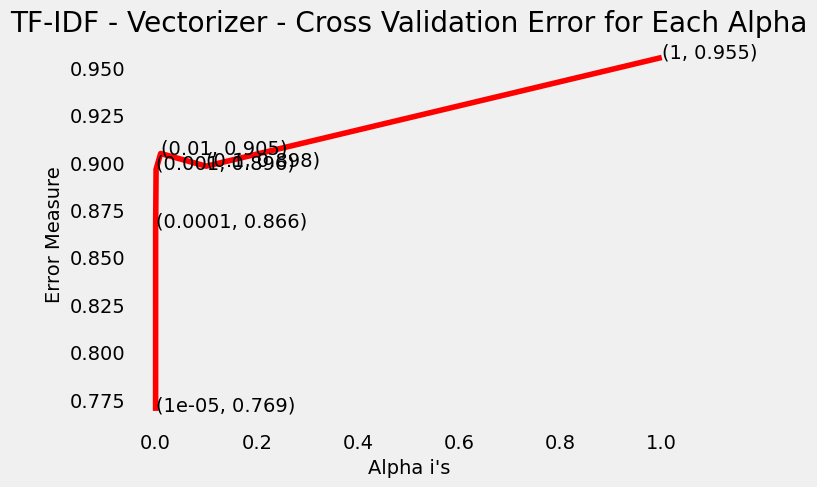

TF-IDF - Vectorizer - For Values of Best Alpha = 1e-05 The Train Log Loss is: 0.6914921285150303
TF-IDF - Vectorizer - For Values of Best Alpha = 1e-05 The Cross Validation Log Loss is: 0.7690415421411252
TF-IDF - Vectorizer - SGD Classiifier Train Accuracy - 72.90535756431437
TF-IDF - Vectorizer - SGD Classiifier Test Accuracy - 66.74358839880422
----- TF-IDF - Vectorizer - SGD Classifier - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.74      0.63      0.68      5822
     Neutral       0.55      0.45      0.49      5888
    Positive       0.69      0.87      0.77      7357

    accuracy                           0.67     19067
   macro avg       0.66      0.65      0.65     19067
weighted avg       0.66      0.67      0.66     19067



In [103]:
process_sgd_classifier(X_train, y_train, X_test, y_test, "TF-IDF - Vectorizer")

For Values of Estimator = 200 The Log Loss is: 0.7563909836205929
For Values of Estimator = 400 The Log Loss is: 0.7344370112335277
For Values of Estimator = 600 The Log Loss is: 0.7343758392422952
For Values of Estimator = 800 The Log Loss is: 0.7348733206791046
For Values of Estimator = 1000 The Log Loss is: 0.7313650757677674


<Figure size 2000x700 with 0 Axes>

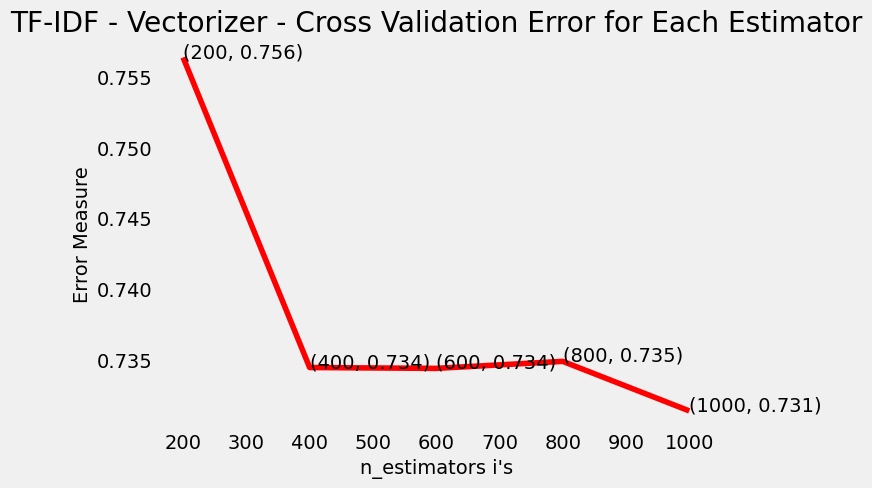

4
1000
TF-IDF - Vectorizer - For Values of Best Estimator = 1000 The Train Log Loss is: 0.699241062158264
TF-IDF - Vectorizer - For Values of Best Estimator = 1000 The Cross Validation Log Loss is: 0.7313650757677674
TF-IDF - Vectorizer - Random Forest Classiifier Train Accuracy - 70.1164345842184
TF-IDF - Vectorizer - Random Forest Classiifier Test Accuracy - 67.42014999737766
----- TF-IDF - Vectorizer - Random Forest Classifier - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.68      0.76      0.72      5822
     Neutral       0.60      0.37      0.46      5888
    Positive       0.70      0.85      0.77      7357

    accuracy                           0.67     19067
   macro avg       0.66      0.66      0.65     19067
weighted avg       0.66      0.67      0.66     19067



In [104]:
process_rf_classifier(X_train, y_train, X_test, y_test, "TF-IDF - Vectorizer")

For Values of Estimator = 200 The Log Loss is: 0.6740392579119893
For Values of Estimator = 400 The Log Loss is: 0.6329549225625543
For Values of Estimator = 600 The Log Loss is: 0.6448203885493492
For Values of Estimator = 800 The Log Loss is: 1.092542107928373
For Values of Estimator = 1000 The Log Loss is: 1.0655529214013193


<Figure size 2000x700 with 0 Axes>

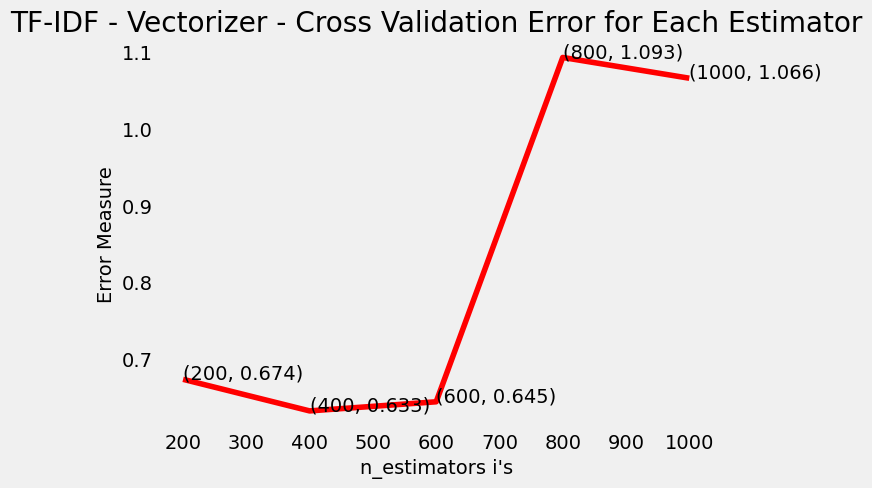

TF-IDF - Vectorizer - For Values of Best Estimator = 400 The Train Log Loss is: 0.6184264623767463
TF-IDF - Vectorizer - For Values of Best Estimator = 400 The Cross Validation Log Loss is: 0.6329549225625543
TF-IDF - Vectorizer - Ada Boost Classiifier Train Accuracy - 77.41457530223165
TF-IDF - Vectorizer - Ada Boost Classiifier Test Accuracy - 76.829076414748
----- TF-IDF - Vectorizer - Ada Boost Classifier - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.73      0.92      0.82      5822
     Neutral       0.81      0.40      0.53      5888
    Positive       0.78      0.95      0.86      7357

    accuracy                           0.77     19067
   macro avg       0.78      0.75      0.74     19067
weighted avg       0.78      0.77      0.74     19067



In [106]:
process_ada_classifier(X_train, y_train, X_test, y_test, "TF-IDF - Vectorizer")

For Values of Estimator = 200 The Log Loss is: 0.5912243814084587
For Values of Estimator = 400 The Log Loss is: 0.7833245402942935
For Values of Estimator = 600 The Log Loss is: 0.9582423750993018
For Values of Estimator = 800 The Log Loss is: 1.0664158681906595
For Values of Estimator = 1000 The Log Loss is: 1.0925421088861542


<Figure size 2000x700 with 0 Axes>

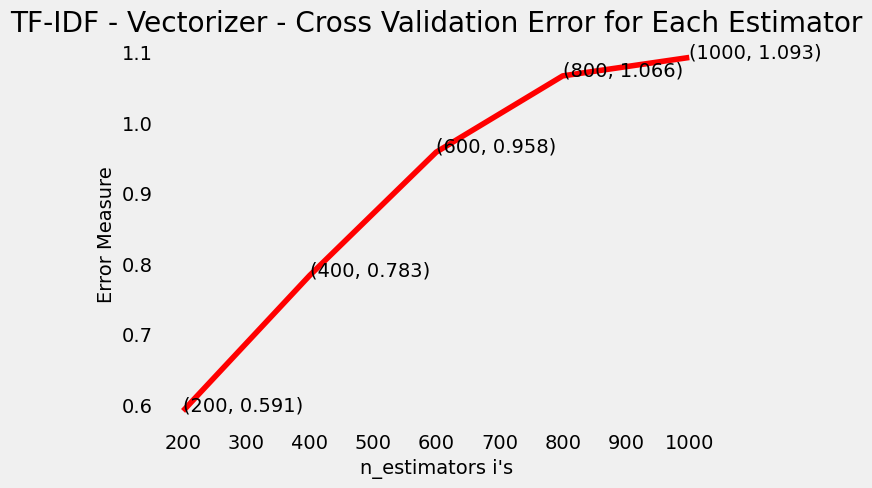

TF-IDF - Vectorizer - For Values of Best Estimator = 200 The Train Log Loss is: 0.5962927709393938
TF-IDF - Vectorizer - For Values of Best Estimator = 200 The Cross Validation Log Loss is: 0.6354901927112759
TF-IDF - Vectorizer - Gradient Boosting Classiifier Train Accuracy - 85.06018409251828
TF-IDF - Vectorizer - Gradient Boosting Classiifier Test Accuracy - 79.8552472858866
----- TF-IDF - Vectorizer - Gradient Boosting Classifier - Classification Report -----
              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83      5822
     Neutral       0.77      0.58      0.66      5888
    Positive       0.80      0.94      0.87      7357

    accuracy                           0.80     19067
   macro avg       0.80      0.79      0.79     19067
weighted avg       0.80      0.80      0.79     19067



In [108]:
process_gradient_boosting_classifier(X_train, y_train, X_test, y_test, "TF-IDF - Vectorizer")

In [77]:
le = LabelEncoder()
y = le.fit_transform(df["sentiment"])

In [78]:
max_features = 2000

In [79]:
tokenizer = Tokenizer(num_words=max_features, split=' ')

In [80]:
tokenizer.fit_on_texts(df["summary"].values)

In [81]:
X = tokenizer.texts_to_sequences(df["summary"].values)

In [82]:
X = pad_sequences(X)

In [83]:
y = to_categorical(y)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42, stratify=y)

In [85]:
embed_dim = 128


In [86]:
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(len(le.classes_),activation='softmax'))
    return model

In [87]:
model = create_lstm_model()

In [88]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [89]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 908, 128)          256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 908, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 276,707
Trainable params: 276,707
Non-trainable params: 0
_________________________________________________________________
None


In [90]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=32, verbose = 2, validation_split=0.2)

Epoch 1/10
1597/1597 - 1524s - loss: 0.5765 - accuracy: 0.7518 - val_loss: 0.4484 - val_accuracy: 0.8214 - 1524s/epoch - 954ms/step
Epoch 2/10
1597/1597 - 1500s - loss: 0.4369 - accuracy: 0.8284 - val_loss: 0.4057 - val_accuracy: 0.8468 - 1500s/epoch - 939ms/step
Epoch 3/10
1597/1597 - 1594s - loss: 0.4063 - accuracy: 0.8430 - val_loss: 0.3967 - val_accuracy: 0.8461 - 1594s/epoch - 998ms/step
Epoch 4/10
1597/1597 - 1517s - loss: 0.3865 - accuracy: 0.8507 - val_loss: 0.3906 - val_accuracy: 0.8524 - 1517s/epoch - 950ms/step
Epoch 5/10
1597/1597 - 1472s - loss: 0.3686 - accuracy: 0.8597 - val_loss: 0.3885 - val_accuracy: 0.8533 - 1472s/epoch - 922ms/step
Epoch 6/10
1597/1597 - 11636s - loss: 0.3582 - accuracy: 0.8643 - val_loss: 0.4043 - val_accuracy: 0.8463 - 11636s/epoch - 7s/step
Epoch 7/10
1597/1597 - 1437s - loss: 0.3476 - accuracy: 0.8672 - val_loss: 0.4040 - val_accuracy: 0.8463 - 1437s/epoch - 900ms/step
Epoch 8/10
1597/1597 - 1438s - loss: 0.3386 - accuracy: 0.8715 - val_loss: 0.

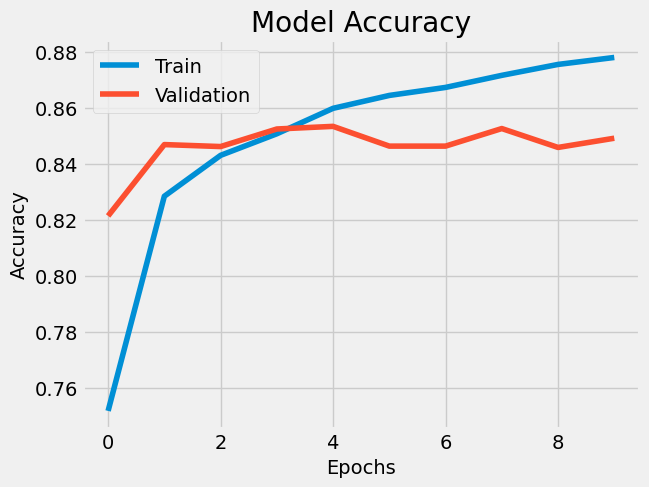

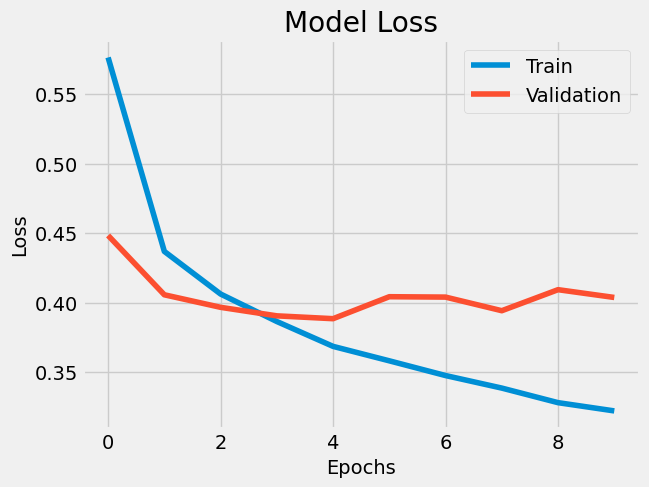

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [92]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Convert y_test to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred)

984/984 [==============================] - 106s 107ms/step


<Axes: >

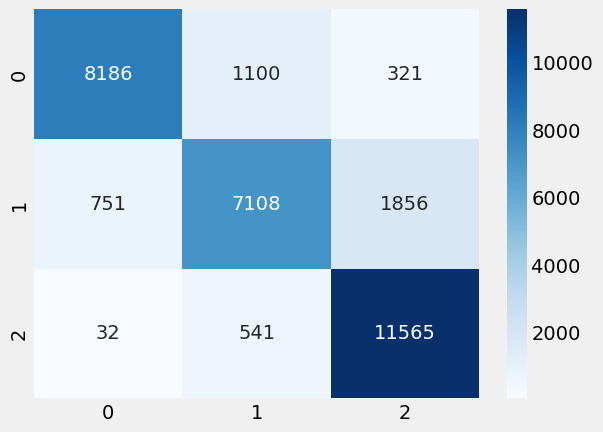

In [93]:
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd') 

In [94]:
print(classification_report(y_test_multiclass, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      9607
           1       0.81      0.73      0.77      9715
           2       0.84      0.95      0.89     12138

    accuracy                           0.85     31460
   macro avg       0.86      0.85      0.85     31460
weighted avg       0.85      0.85      0.85     31460



In [95]:
def create_cnn_model():
    model = Sequential()
    model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
    model.add(Conv1D(64, 2, padding='same', activation='relu'))
    model.add(MaxPooling1D(2))  
    model.add(Flatten())
    model.add(Dense(units=1024,activation="relu"))
    model.add(Dense(units=512,activation="relu"))
    model.add(Dense(len(le.classes_),activation='softmax'))
    return model

In [96]:
model = create_cnn_model()

In [97]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [98]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 908, 128)          256000    
                                                                 
 conv1d (Conv1D)             (None, 908, 64)           16448     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 454, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 29056)             0         
                                                                 
 dense_1 (Dense)             (None, 1024)              29754368  
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                      

In [99]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=32, verbose = 2, validation_split=0.2)

Epoch 1/10
1597/1597 - 590s - loss: 0.5256 - accuracy: 0.7801 - val_loss: 0.4176 - val_accuracy: 0.8378 - 590s/epoch - 370ms/step
Epoch 2/10
1597/1597 - 591s - loss: 0.3938 - accuracy: 0.8494 - val_loss: 0.4037 - val_accuracy: 0.8441 - 591s/epoch - 370ms/step
Epoch 3/10
1597/1597 - 600s - loss: 0.3400 - accuracy: 0.8738 - val_loss: 0.4149 - val_accuracy: 0.8405 - 600s/epoch - 376ms/step
Epoch 4/10
1597/1597 - 589s - loss: 0.2914 - accuracy: 0.8923 - val_loss: 0.4473 - val_accuracy: 0.8362 - 589s/epoch - 369ms/step
Epoch 5/10
1597/1597 - 579s - loss: 0.2455 - accuracy: 0.9097 - val_loss: 0.5017 - val_accuracy: 0.8330 - 579s/epoch - 362ms/step
Epoch 6/10
1597/1597 - 589s - loss: 0.2082 - accuracy: 0.9219 - val_loss: 0.5663 - val_accuracy: 0.8315 - 589s/epoch - 369ms/step
Epoch 7/10
1597/1597 - 579s - loss: 0.1748 - accuracy: 0.9341 - val_loss: 0.6945 - val_accuracy: 0.8214 - 579s/epoch - 362ms/step
Epoch 8/10
1597/1597 - 592s - loss: 0.1435 - accuracy: 0.9468 - val_loss: 0.7170 - val_acc

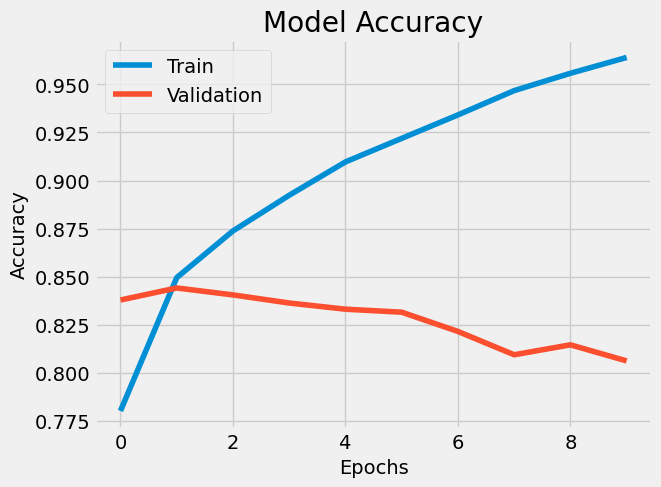

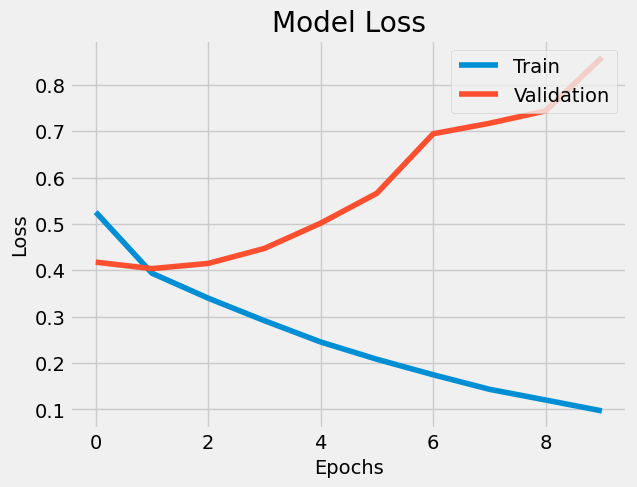

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [101]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Convert y_test to multiclass format
y_test_multiclass = np.argmax(y_test, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred)

984/984 [==============================] - 49s 50ms/step


<Axes: >

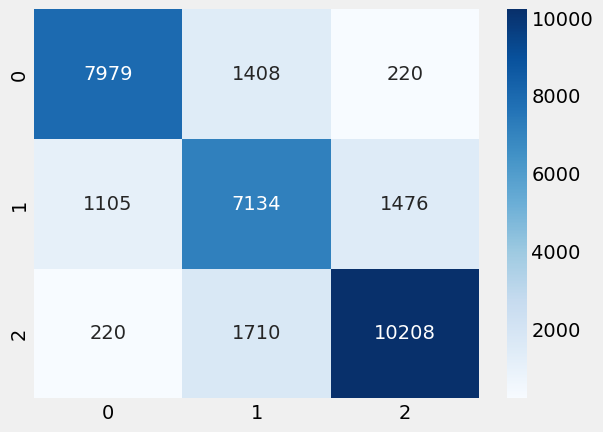

In [102]:
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd') 

In [103]:
print(classification_report(y_test_multiclass, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      9607
           1       0.70      0.73      0.71      9715
           2       0.86      0.84      0.85     12138

    accuracy                           0.80     31460
   macro avg       0.80      0.80      0.80     31460
weighted avg       0.81      0.80      0.81     31460

